# Titanic Survival Prediction

##### The objective of this project is to build a machine learning model that predicts whether a passenger survived or not in the Titanic disaster based on features such as age, gender, ticket class, family size, and other attributes. By analyzing the Titanic dataset, the model aims to identify the key factors influencing survival and accurately classify passengers into 'Survived' or 'Not Survived' categories

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Data

#### Let's start by reading in the Titanic-Dataset.csv file into Pandas Dataframe

In [2]:
train = pd.read_csv('Titanic-Dataset.csv')

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

#### Missing Data: We can use seaborn to create a simple heatmap to see where we are missing data!

In [4]:
train.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

<Axes: >

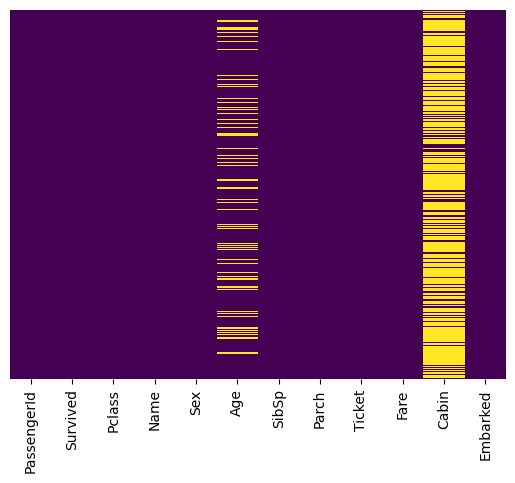

In [5]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False,
            cmap = 'viridis')

<Axes: xlabel='Survived', ylabel='count'>

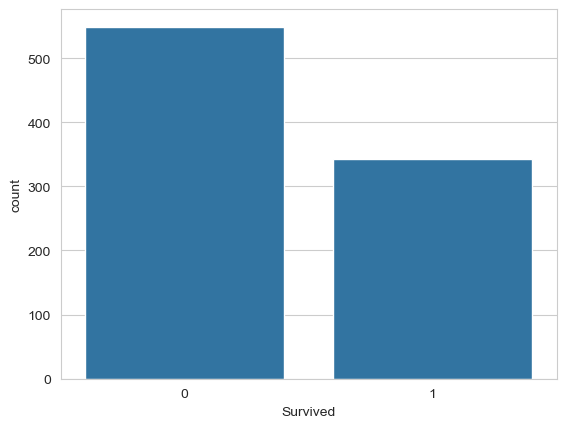

In [6]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = train)

<Axes: xlabel='Survived', ylabel='count'>

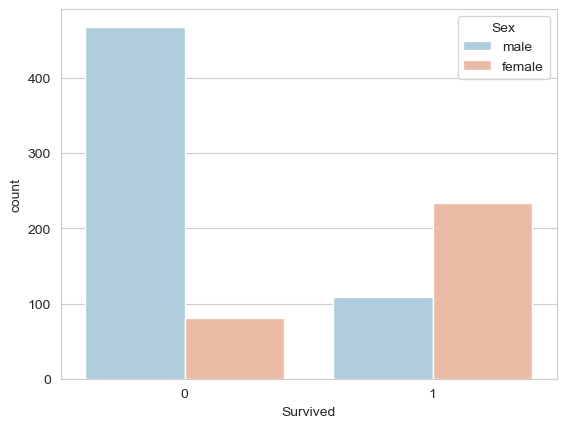

In [7]:
sns.set_style('whitegrid')
sns.countplot(x ='Survived', hue ='Sex', data = train, palette = 
              'RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

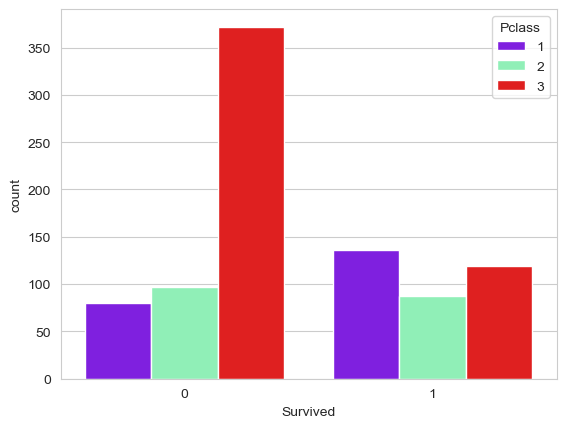

In [8]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',hue = 'Pclass',data=train, palette =
              'rainbow')

<Axes: xlabel='Age', ylabel='Count'>

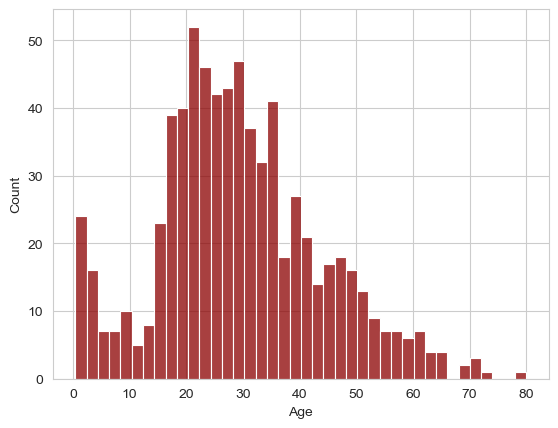

In [9]:
sns.histplot(train['Age'].dropna(), kde = False, color = 'darkred'
             , bins = 40)

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_16944\309581232.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = 'SibSp', data = train, palette = 'rainbow')


<Axes: xlabel='SibSp', ylabel='count'>

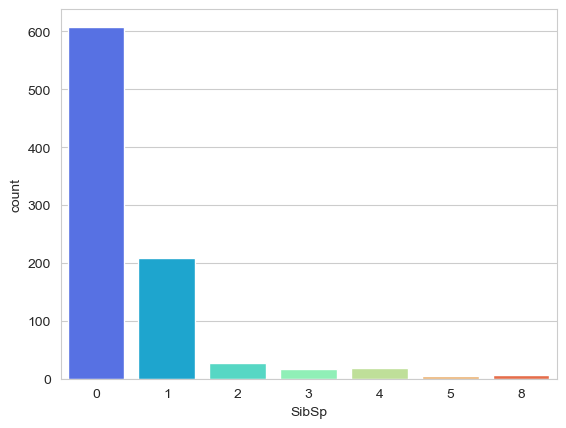

In [10]:
sns.countplot( x = 'SibSp', data = train, palette = 'rainbow')

<Axes: >

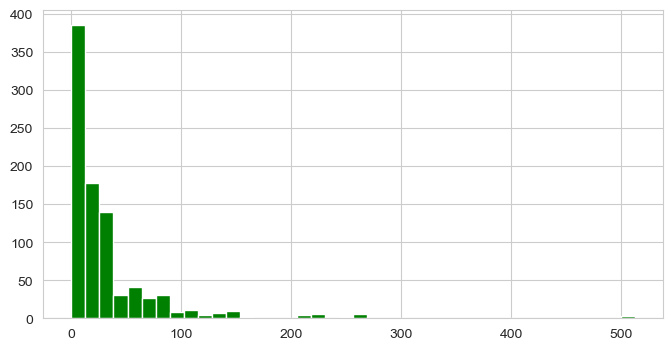

In [11]:
train['Fare'].hist( color = 'green', bins = 40, figsize = (8,4))

# Data cleaning

#### We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers(imputation). However we can be smarter about this and check the average age by passenger class

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_16944\2314111024.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( x = 'Pclass', y = 'Age', data = train, palette =


<Axes: xlabel='Pclass', ylabel='Age'>

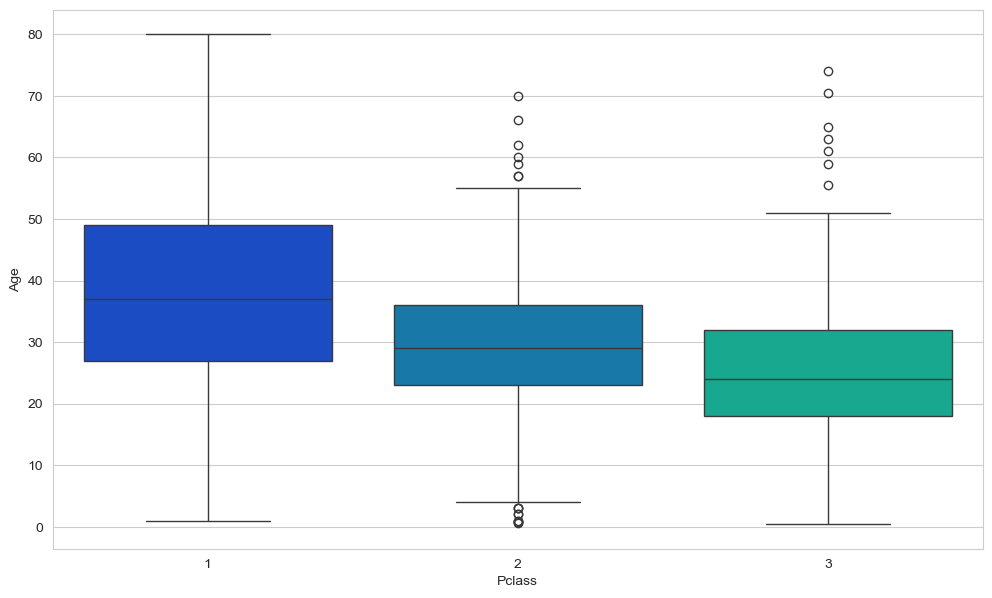

In [12]:
plt.figure(figsize = (12,7))
sns.boxplot( x = 'Pclass', y = 'Age', data = train, palette = 
             'winter')

#### We can see the wealthier passengers in the higher class tent to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [14]:
# Apply that function

train['Age'] = train[['Age','Pclass']].apply(impute_age, axis = 1)

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_16944\3438464256.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_16944\3438464256.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

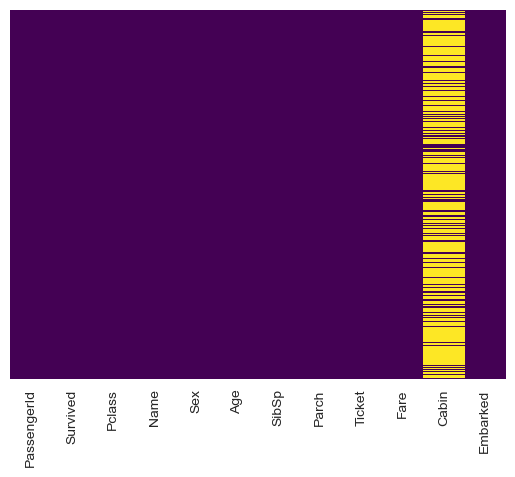

In [15]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False,
            cmap = 'viridis')

In [16]:
train.drop('Cabin', axis = 1, inplace = True)

In [17]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [18]:
train.dropna(inplace = True)

#### Converting Categorical Features

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [20]:
pd.get_dummies(train['Embarked'], drop_first = True, dtype = int).head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [21]:
sex = pd.get_dummies(train['Sex'], drop_first = True, dtype = int)
embark = pd.get_dummies(train['Embarked'], drop_first = True, dtype = int)

In [22]:
train.drop(['Sex','Embarked','Name','Ticket'], axis = 1, inplace
           = True)

In [23]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

In [24]:
train = pd.concat([train, sex, embark], axis = 1)

In [25]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

# Building a Logistic Regression Model

In [26]:
# train test split

train.drop('Survived', axis = 1).head()

PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1       3  22.0      1      0   7.2500     1  0  1
1            2       1  38.0      1      0  71.2833     0  0  0
2            3       3  26.0      0      0   7.9250     0  0  1
3            4       1  35.0      1      0  53.1000     0  0  1
4            5       3  35.0      0      0   8.0500     1  0  1

In [27]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(train.drop
        ('Survived', axis=1), train['Survived'], test_size = 0.30,
        random_state = 101)

# Training and Predicting

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression(max_iter = 1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [32]:
predictions = logmodel.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
accuracy = confusion_matrix(y_test, predictions)

In [35]:
accuracy

array([[149,  14],
       [ 33,  71]])

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy = accuracy_score( y_test, predictions)
accuracy

0.8239700374531835

In [38]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [39]:
print(y_test)

511    0
613    0
615    1
337    1
718    0
      ..
792    0
828    1
732    0
669    1
634    0
Name: Survived, Length: 267, dtype: int64


# Survival Prediction for All Passengers

In [40]:
res = logmodel.predict(X_test)

for i, pred in enumerate(res):
    if pred == 0:
        print(f"passenger {i}: So Sorry! Not Survived")
    else:
        print(f"passenger {i}: Survived")

passenger 0: So Sorry! Not Survived
passenger 1: So Sorry! Not Survived
passenger 2: Survived
passenger 3: Survived
passenger 4: So Sorry! Not Survived
passenger 5: So Sorry! Not Survived
passenger 6: So Sorry! Not Survived
passenger 7: So Sorry! Not Survived
passenger 8: So Sorry! Not Survived
passenger 9: Survived
passenger 10: Survived
passenger 11: Survived
passenger 12: So Sorry! Not Survived
passenger 13: Survived
passenger 14: So Sorry! Not Survived
passenger 15: So Sorry! Not Survived
passenger 16: Survived
passenger 17: Survived
passenger 18: Survived
passenger 19: So Sorry! Not Survived
passenger 20: So Sorry! Not Survived
passenger 21: So Sorry! Not Survived
passenger 22: So Sorry! Not Survived
passenger 23: So Sorry! Not Survived
passenger 24: So Sorry! Not Survived
passenger 25: So Sorry! Not Survived
passenger 26: Survived
passenger 27: Survived
passenger 28: So Sorry! Not Survived
passenger 29: So Sorry! Not Survived
passenger 30: So Sorry! Not Survived
passenger 31: So 

# Predict Survival for Any Passenger

##### Check for any passenger by giving input

In [41]:
import warnings
warnings.filterwarnings('ignore')

res = logmodel.predict([X_test. iloc[3]])

if res[0] == 0:
    print("So sorry! Not Survived")
else:
    print("Survived")

Survived
